In [152]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

# Feature Data
filename = "features.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)

data = pd.read_csv(filepath,index_col=False, header=0)
print(len(data))
data.head()

339


,Solar,Energy,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2.965,2018.869,1990,7.17,8.8,1,0,0,0,0,0,0,0,0,0,0,0
1,3.196,1640.310,1990,7.48,22.7,0,1,0,0,0,0,0,0,0,0,0,0
2,4.403,1559.289,1990,7.57,29.8,0,0,1,0,0,0,0,0,0,0,0,0
3,4.853,1299.971,1990,7.69,26.8,0,0,0,1,0,0,0,0,0,0,0,0
4,5.357,1143.417,1990,7.96,53.9,0,0,0,0,1,0,0,0,0,0,0,0


In [128]:
rdata = data.reset_index()


In [97]:
# Stats for Feature Energy
import scipy.stats as scst
import scipy.special as scsp
import seaborn as sb

def normalizing_feature(featurename):
    (mu, sigma) = scst.norm.fit(data[featurename])
    mu = round(mu,3)
    sigma = round(sigma,3)
    mode = data[featurename].mode().astype(int)
    print('\nmu(Mean):', mu)
    print('sigma(Standard Deviation):', sigma)
    print('Mode:', mode)

    # Skewness of Target Variable
    plt.figure(3)
    sb.distplot(data[featurename] , fit=scst.norm)
    plt.title(featurename + ' Distribution', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.legend(['Normal Distribution($\mu=$%.3f, $\sigma=$%.3f)' % (mu,sigma)], loc='best')
    plt.show()

    # Probability Plot(Similar to Quantile-Quantile Plot)
    plt.figure(4)
    scst.probplot(data[featurename], plot=plt)
    plt.show()

    # Skewness and Kurtosis
    print('Skewness: %.5f' % data[featurename].skew())
    print('Kurtosis: %.5f' % data[featurename].kurt())
                       


mu(Mean): 1669.965
sigma(Standard Deviation): 365.384
Mode: 0      1122
1      1136
2      1143
3      1144
4      1161
5      1163
6      1168
7      1169
8      1175
9      1177
10     1178
11     1183
12     1184
13     1188
14     1193
15     1195
16     1210
17     1214
18     1216
19     1229
20     1230
21     1243
22     1251
23     1256
24     1264
25     1265
26     1268
27     1269
28     1270
29     1280
       ... 
309    2293
310    2297
311    2315
312    2320
313    2321
314    2323
315    2337
316    2341
317    2347
318    2349
319    2359
320    2360
321    2368
322    2369
323    2380
324    2381
325    2389
326    2430
327    2467
328    2494
329    2541
330    2544
331    2566
332    2568
333    2596
334    2608
335    2660
336    2680
337    2709
338    2777
Length: 339, dtype: int64


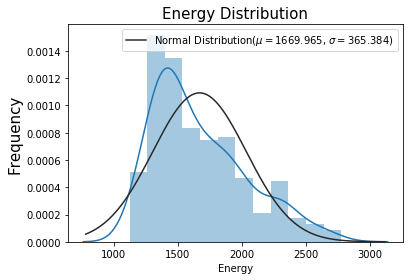

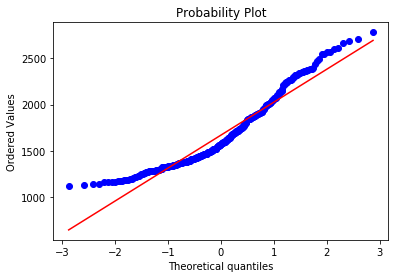

Skewness: 0.83955
Kurtosis: -0.03385


In [98]:
normalizing_feature('Energy')


mu(Mean): 6.145
sigma(Standard Deviation): 3.219
Mode: 0    5
dtype: int64


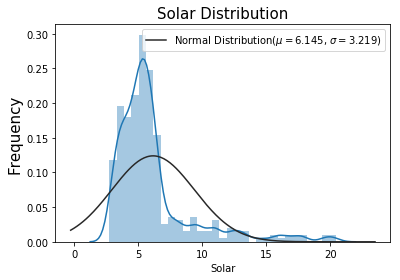

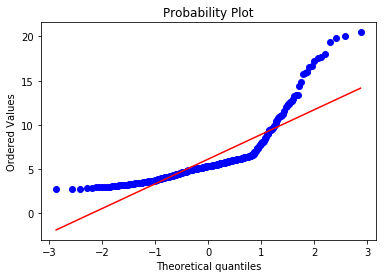

Skewness: 2.27343
Kurtosis: 5.53929


In [99]:
normalizing_feature('Solar')


mu(Mean): 9.894
sigma(Standard Deviation): 1.82
Mode: 0     8
1     8
2     8
3     8
4    12
dtype: int64


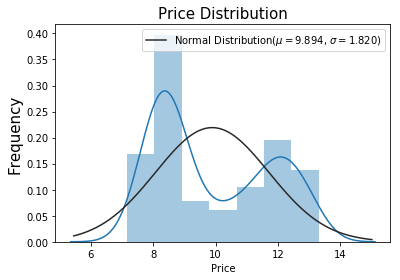

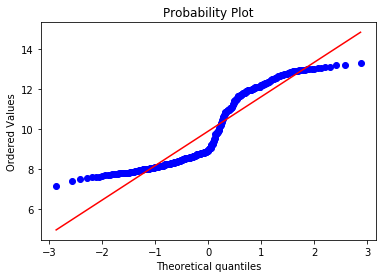

Skewness: 0.40379
Kurtosis: -1.43322


In [100]:
normalizing_feature('Price')


mu(Mean): 7.399
sigma(Standard Deviation): 0.208
Mode: 0      7
1      7
2      7
3      7
4      7
5      7
6      7
7      7
8      7
9      7
10     7
11     7
12     7
13     7
14     7
15     7
16     7
17     7
18     7
19     7
20     7
21     7
22     7
23     7
24     7
25     7
26     7
27     7
28     7
29     7
      ..
309    7
310    7
311    7
312    7
313    7
314    7
315    7
316    7
317    7
318    7
319    7
320    7
321    7
322    7
323    7
324    7
325    7
326    7
327    7
328    7
329    7
330    7
331    7
332    7
333    7
334    7
335    7
336    7
337    7
338    7
Length: 339, dtype: int64


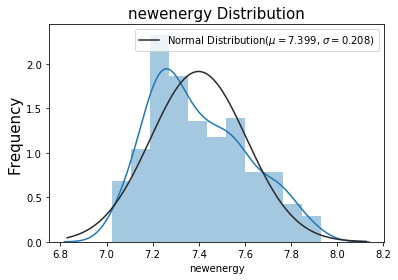

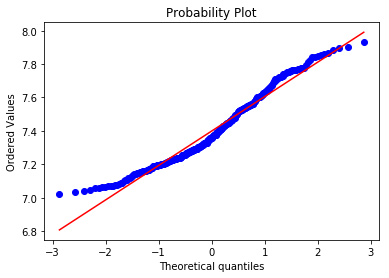

Skewness: 0.47202
Kurtosis: -0.62664


In [101]:
data['newenergy'] = np.log1p(data['Energy'])

normalizing_feature('newenergy')




mu(Mean): 2.375
sigma(Standard Deviation): 0.164
Mode: 0    2
1    2
2    2
3    2
4    2
dtype: int64


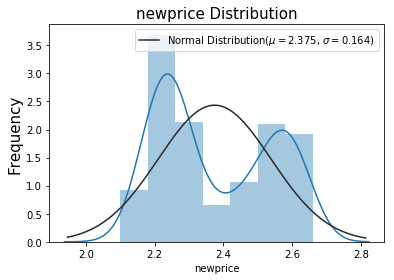

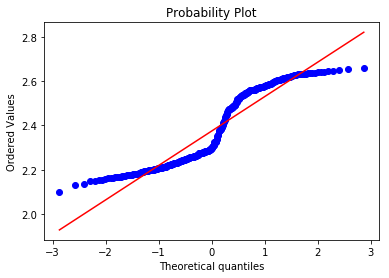

Skewness: 0.30307
Kurtosis: -1.50148


In [102]:
data['newprice'] = np.log1p(data['Price'])
normalizing_feature('newprice')


mu(Mean): 1.894
sigma(Standard Deviation): 0.355
Mode: 0    1
dtype: int64


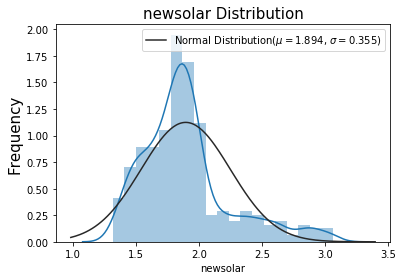

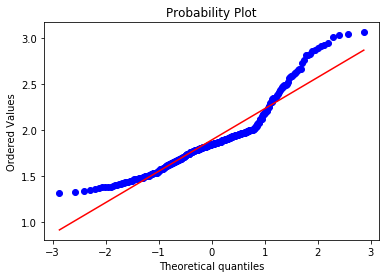

Skewness: 1.16899
Kurtosis: 1.42443


In [103]:
data['newsolar'] = np.log1p(data['Solar'])
normalizing_feature('newsolar')


mu(Mean): 40.627
sigma(Standard Deviation): 20.749
Mode: 0    0
dtype: int64


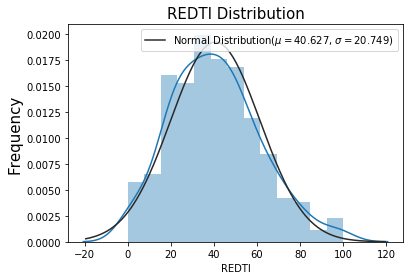

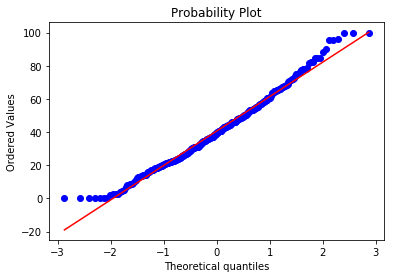

Skewness: 0.40908
Kurtosis: -0.00693


In [104]:
normalizing_feature('REDTI')

In [154]:
#X = data[["Energy", "Price", "year", "REDTI", "month_1", "month_2", "month_3", "month_4", "month_5", "month_6", "month_7", "month_8", "month_9", "month_10", "month_11", "month_12" ]]
X = rdata[["index", "newenergy", "newprice", "year", "REDTI", "month_1", "month_2", "month_3", "month_4", "month_5", "month_6", "month_7", "month_8", "month_9", "month_10", "month_11", "month_12" ]]

y = rdata["newsolar"].values.reshape(-1, 1)
print(X.shape, y.shape)


(339, 17) (339, 1)


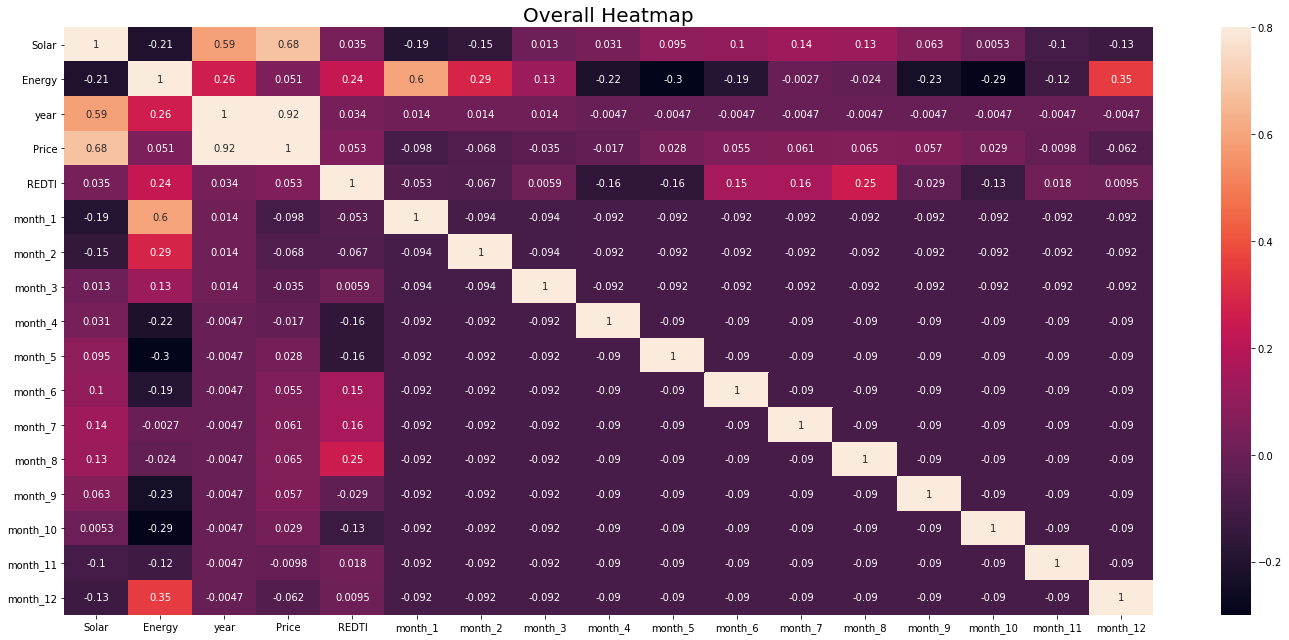

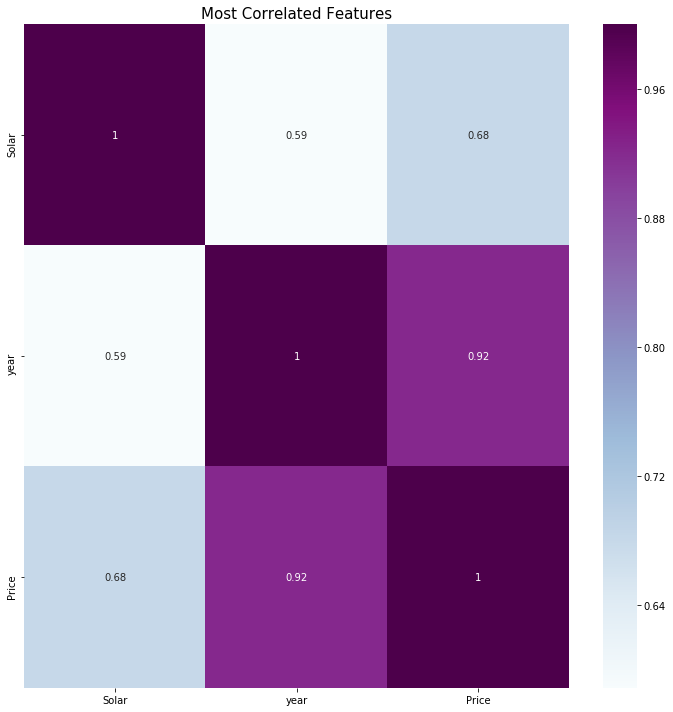

Most Correlated Features with Target Variable:

year
Price


In [155]:
import seaborn as sb

# Correlation Matrix
CMtx = data.corr()
plt.figure(5, figsize=(20, 9))
sb.heatmap(CMtx, vmax=0.8, annot=True)  # Heatmap
plt.title('Overall Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

# Most Correlated Features
MCF = CMtx.index[abs(CMtx['Solar']) > 0.5]  # Features that have a correlation greater than 0.5 with the Target Variable
plt.figure(6, figsize=(10,10))
sb.heatmap(data[MCF].corr(), annot=True, cmap='BuPu')
plt.title('Most Correlated Features', fontsize=15)
plt.tight_layout()
plt.show()

# Listing
MCFL = list(MCF)
MCFL.remove('Solar')
print('Most Correlated Features with Target Variable:\n')
for name in MCFL:
   print(name)



In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into Train and Test
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train, X_test = X[1:len(X)-12], X[len(X)-12:]
y_train, y_test = y[1:len(X)-12], y[len(X)-12:]

# Scale the data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
print(len(X_train), len(X_test), len(y_train), len(y_test))

326 12 326 12


In [131]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2,random_state=0)


In [132]:
import numpy as np
y_train_ravel = np.ravel(y_train_scaled)


In [133]:
rf = rf.fit(X_train_scaled, y_train_ravel)


In [134]:
rf.score(X_test_scaled, y_test_scaled)


-1.6300494293498695

In [135]:
y_test_scaled


array([[3.45185561],
       [3.75363466],
       [3.85589699],
       [3.92429735],
       [3.82388386],
       [3.47923005],
       [3.13524481],
       [2.39266919],
       [2.17558361],
       [2.29494568],
       [2.51077561],
       [3.5332973 ]])

In [136]:

y_predict = rf.predict(X_test_scaled)

In [137]:
y_predict

array([2.33674692, 2.43911029, 2.43911029, 2.43911029, 2.43911029,
       2.43911029, 2.43911029, 2.43911029, 1.81864894, 1.55463655,
       1.91949046, 2.43911029])

In [138]:
plt.scatter(y_test_scaled, y_predict)


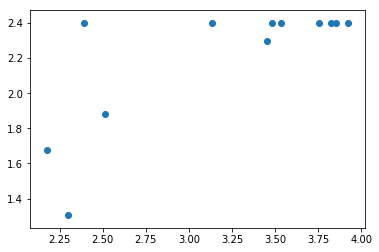

In [127]:
plt.show()